In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
filename = ('openrice_tst.csv')
df = pd.read_csv(filename)
print(df)

                                              rest_name address_rd  \
0                唇茶 (堪富利士道) Tea Only (Humphreys Avenue)      堪富利士道   
1                                           Sweet Scoop        廣東道   
2     蟹仙海鮮私房．蒸氣石碢 (環海大廈) Crab Fairy (Universal Mansion)       天文臺道   
3                                              江記大閘蟹專門店      加連威老道   
4                            翠林辣蟹舫 Greenland Spicy Crab       亞士厘道   
...                                                 ...        ...   
1638                                            Helen’s        厚福街   
1639                             奇點餐廳 Someplace Special        山林道   
1640                                              Amuse       柯士甸道   
1641                                             Dijaya        棉登徑   
1642                                8 Fine Irishmen Pub       天文臺道   

     price_range pri_category sec_category  collection  comments  rating  \
0          $50以下        港式/粵菜   快餐店,少鹽少糖食店        4939        92     4.3   
1      

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643 entries, 0 to 1642
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rest_name     1643 non-null   object 
 1   address_rd    1643 non-null   object 
 2   price_range   1643 non-null   object 
 3   pri_category  1643 non-null   object 
 4   sec_category  1479 non-null   object 
 5   collection    1643 non-null   int64  
 6   comments      1643 non-null   int64  
 7   rating        1643 non-null   float64
 8   likes         1643 non-null   int64  
 9   dislikes      1643 non-null   int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 128.5+ KB


In [5]:
df.isnull().sum().sort_values(ascending=False)

sec_category    164
rest_name         0
address_rd        0
price_range       0
pri_category      0
collection        0
comments          0
rating            0
likes             0
dislikes          0
dtype: int64

In [6]:
import sqlite3 
con = sqlite3.connect('openrice_tst.db')

# <center> Restaurants primary category related </center>

In [7]:
sql = "SELECT pri_category,COUNT(), ROUND(COUNT()*100.0/SUM(COUNT()) OVER(),1) AS category_ratio, ROUND(AVG(likes),1) AS avg_likes, ROUND(AVG(dislikes),1) AS avg_dislikes, ROUND(AVG(dislikes)/AVG(likes)+AVG(dislikes),1) AS Poor_rating_rate, ROUND(AVG(rating),1) AS avg_rating,ROUND(AVG(collection),1) AS avg_collection FROM openrice_tst GROUP BY pri_category ORDER BY COUNT() DESC" 
df = pd.read_sql_query(sql,con)
df

,pri_category,COUNT(),category_ratio,avg_likes,avg_dislikes,Poor_rating_rate,avg_rating,avg_collection
0,西式,492,29.9,110.1,8.3,8.4,3.9,8525.9
1,港式/粵菜,350,21.3,58.6,6.2,6.3,3.7,3708.7
2,日本菜,323,19.7,144.9,10.2,10.2,4.1,8830.0
3,其他中菜,170,10.3,104.0,10.7,10.8,3.8,6656.4
4,其他亞洲菜,158,9.6,139.4,11.4,11.4,3.8,8492.7
5,多國菜,128,7.8,113.4,10.2,10.3,4.0,9501.7
6,中東/地中海菜,15,0.9,26.0,1.5,1.5,3.9,1502.1
7,中南美菜,7,0.4,101.4,5.0,5.0,4.0,10422.0


<function matplotlib.pyplot.show(close=None, block=None)>

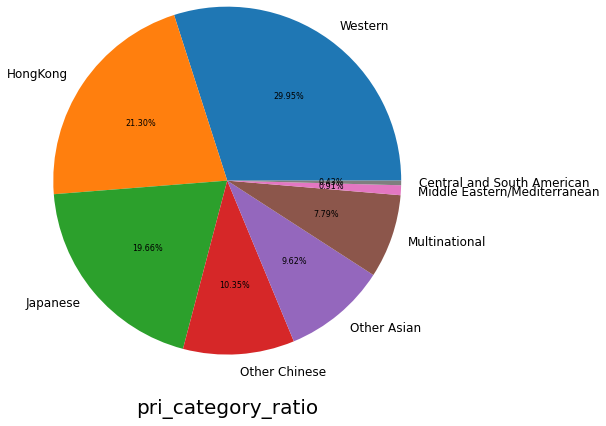

In [8]:
x = (['Western','HongKong','Japanese','Other Chinese','Other Asian','Multinational','Middle Eastern/Mediterranean','Central and South American'])
y = np.array([492,350,323,170,158,128,15,7])

patches,l_text,p_text=plt.pie(y,labels=x,autopct='%.2f%%',radius=2)
for t in p_text:
    t.set_size(8)
for t in l_text:
    t.set_size(12)
plt.title('pri_category_ratio',size = 20, y=-0.6)
plt.axis('off')
plt.show

# <center> Restaurants address related </center>

In [9]:
sql = "SELECT address_rd, COUNT(address_rd),round(AVG(rating),1) AS avg_rating,ROUND(AVG(likes),1) AS avg_likes, ROUND(AVG(dislikes),1) AS avg_dislikes, ROUND(AVG(collection),0) AS avg_collection FROM openrice_tst GROUP BY address_rd ORDER BY avg_rating DESC"
df = pd.read_sql_query(sql,con)
df

,address_rd,COUNT(address_rd),avg_rating,avg_likes,avg_dislikes,avg_collection
0,棉登徑白蘭軒道,5,4.4,155.6,2.6,7618.0
1,中間道,11,4.2,51.7,2.7,4309.0
2,漆咸道,55,4.1,78.3,8.2,4371.0
3,山林道,48,4.1,118.0,6.7,6160.0
4,寶勒巷,47,4.1,115.0,3.8,6510.0
5,宜昌街,4,4.1,133.0,12.8,11983.0
6,天文臺道,16,4.1,174.8,7.4,8558.0
7,白加士街20號,1,4.0,48.0,1.0,2920.0
8,河內道,73,4.0,112.9,8.1,8235.0
9,棉登徑,40,4.0,191.0,8.6,12790.0


# <center> Top 10 roads with the highest number of restaurants </center>


In [10]:
sql = "SELECT address_rd,COUNT(*) AS total, ROUND(COUNT()*100.0/SUM(COUNT()) over(),1) AS rd_ratio, round(AVG(rating),1) AS avg_rating FROM openrice_tst GROUP BY address_rd HAVING COUNT(*)>=50 ORDER BY total DESC"
df = pd.read_sql_query(sql,con)  
df

,address_rd,total,rd_ratio,avg_rating
0,廣東道,196,18.0,3.8
1,彌敦道,183,16.8,3.8
2,柯士甸道,129,11.9,3.9
3,梳士巴利道,128,11.8,3.9
4,麼地道,128,11.8,3.9
5,金巴利道,82,7.5,3.9
6,河內道,73,6.7,4.0
7,加連威老道,57,5.2,3.8
8,厚福街,56,5.2,3.9
9,漆咸道,55,5.1,4.1


In [11]:
sql = "SELECT pri_category, COUNT(pri_category),address_rd FROM openrice_tst WHERE pri_category = '日本菜' GROUP BY address_rd,pri_category HAVING COUNT(pri_category)>20"
df = pd.read_sql_query(sql,con)
df

,pri_category,COUNT(pri_category),address_rd
0,日本菜,40,廣東道
1,日本菜,38,彌敦道
2,日本菜,21,柯士甸道


In [12]:
sql = "SELECT pri_category, COUNT(pri_category),address_rd FROM openrice_tst WHERE pri_category = '港式/粵菜' GROUP BY address_rd,pri_category HAVING COUNT(pri_category)>20"
df = pd.read_sql_query(sql,con)
df

,pri_category,COUNT(pri_category),address_rd
0,港式/粵菜,25,廣東道
1,港式/粵菜,33,彌敦道
2,港式/粵菜,27,柯士甸道
3,港式/粵菜,26,麼地道


In [13]:
sql = "SELECT pri_category, COUNT(pri_category),address_rd FROM openrice_tst WHERE pri_category = '西式' GROUP BY address_rd,pri_category HAVING COUNT(pri_category)>20"
df = pd.read_sql_query(sql,con)
df

,pri_category,COUNT(pri_category),address_rd
0,西式,67,廣東道
1,西式,59,彌敦道
2,西式,46,柯士甸道
3,西式,62,梳士巴利道
4,西式,37,河內道
5,西式,46,麼地道


# <center> Price range related </center>

In [14]:
sql = "SELECT price_range, COUNT(price_range), ROUND(COUNT()*100.0/SUM(COUNT()) over(),1) AS price_ratio, round(AVG(rating),1) AS avg_rating FROM openrice_tst GROUP BY price_range ORDER BY avg_rating DESC"
df = pd.read_sql_query(sql,con)
df

,price_range,COUNT(price_range),price_ratio,avg_rating
0,$801以上,57,3.5,4.2
1,$401-800,124,7.5,4.1
2,$201-400,390,23.7,4.0
3,$101-200,413,25.1,3.9
4,$51-100,333,20.3,3.8
5,$50以下,326,19.8,3.6


<function matplotlib.pyplot.show(close=None, block=None)>

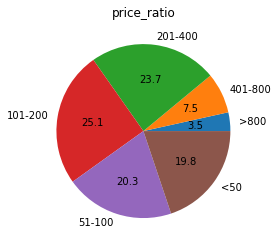

In [15]:
y = np.array([57,124,390,413,333,326])
x = (['>800','401-800','201-400','101-200','51-100','<50'])
plt.pie(y,labels = x,autopct='%0.1f',radius=1)
plt.title('price_ratio')
plt.show

In [16]:
sql = "SELECT price_range, pri_category, COUNT(price_range) FROM openrice_tst GROUP BY pri_category,price_range"
df = pd.read_sql_query(sql,con)
df

,price_range,pri_category,COUNT(price_range)
0,$101-200,中南美菜,4
1,$201-400,中南美菜,2
2,$401-800,中南美菜,1
3,$101-200,中東/地中海菜,2
4,$201-400,中東/地中海菜,2
5,$50以下,中東/地中海菜,5
6,$51-100,中東/地中海菜,6
7,$101-200,其他中菜,43
8,$201-400,其他中菜,30
9,$401-800,其他中菜,7


In [21]:
sql = "SELECT address_rd,COUNT(price_range) FROM openrice_tst WHERE price_range IN ('$801以上','$401-800','$201-400') GROUP BY address_rd ORDER BY COUNT(price_range) DESC"
df = pd.read_sql_query(sql,con)
df

,address_rd,COUNT(price_range)
0,廣東道,68
1,彌敦道,67
2,麼地道,55
3,梳士巴利道,53
4,柯士甸道,51
5,金巴利道,27
6,山林道,23
7,寶勒巷,21
8,北京道,21
9,金馬倫道,20


In [402]:
sql = "SELECT * FROM openrice_tst WHERE price_range IN ('$101-200') GROUP BY address_rd HAVING COUNT(*)>=50 AND rating>4.0 "
df = pd.read_sql_query(sql,con)
df

,rest_name,address_rd,price_range,pri_category,sec_category,collection,comments,rating,likes,dislikes
0,莆田 (美麗華廣場2期) PUTIEN (Mira Place Two),彌敦道,$101-200,其他中菜,"點心,酒樓,山珍海味",11436,717,4.2,663,4


# <center> Secondary category wordcloud </center>

In [403]:
import jieba
import numpy as np
from wordcloud import WordCloud, STOPWORDS

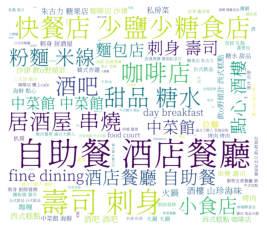

In [404]:
TEXT =('sec_category.txt')
CHINESE_FONT = ('GenWanMin.ttf')
txt_file = open ('sec_category.txt','r').read()
def cut_the_words(test=TEXT):
    with open(txtfile, 'r') as rp:
        content = rp.read()
    words_list = jieba.cut(content, cut_all = True)
    return ' '.join(words_list)

wordcloud = WordCloud(font_path = CHINESE_FONT, background_color="white",width=1000, height=860,margin=2).generate(txt_file)
plt.imshow(wordcloud)
plt.axis("off")
wordcloud.to_file('sec_category_wordcloud.png')
plt.show()

In [405]:
con.close()